# Sediment grain size and MP particle size comparison 

In [2]:
%reset -f
import pandas as pd
#pd.set_option("display.max_rows", None, "display.max_columns", None) # set the limit of rows and columns that are displayed to unlimited
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

import environmental MP (contamination cleaned, except IOW blanks) data "env_MP" as generated in Jupyter notebook as `mp` and grain size distribution data:
- `sedCumWide` for cumulative __non-equally__ spaced frequency data
- `sedPercentWide` for 1%-binned equally spaced size data

In [3]:
#load MP and sediment files
mp = pd.read_csv('env_MP_ds1.csv') 
mp_kg = pd.read_csv('MP_kg_shape.csv') #shape

#allow dublicate values when reading csv:
#sedCumWide = pd.read_csv('sed_grain_size_BSB_cum_avg_sn.csv', header=None).transpose()
#sedCumWide.columns = sedCumWide.iloc[0]
#sedCumWide = sedCumWide.reindex(sedCumWide.index.drop(0)).reset_index(drop=True)

sedCumWide = pd.read_csv('sed_grain_size_BSB_cum_avg_sn_dubl.csv',index_col=0).transpose()
#sedCumWide.set_index([:,0],inplace=True)
#sedCumWide.set_index([2])
#sedCumWide.rename_axis('',axis='columns',inplace=True)
#skipped to do averages between beaches, dooubl droped

sedPercentWide = pd.read_csv('sed_grain_size_BSB_1bin_cum_avg_sn_dubl.csv',index_col=0).transpose()
macro = pd.read_csv('BSB_macro.csv') 
sedCumWide

,0.084,0.093,0.102,0.112,0.122,0.134,0.148,0.162,0.178,0.195,...,863.900,948.200,1041.000,1143.000,1255.000,1377.000,1512.000,1660.000,1822.000,2000.000
Zopot_main_1,0.001752,0.002491,0.003835,0.005111,0.006198,0.007303,0.008404,0.009381,0.010393,0.011394,...,90.247019,94.034987,96.777873,98.505386,99.418336,99.802857,99.926483,99.958607,99.977367,99.993596
Melnrage_main_1,0.001665,0.002361,0.003613,0.004772,0.005723,0.006639,0.007482,0.008164,0.008795,0.009343,...,57.730797,72.089025,83.792319,91.874316,96.488858,98.592572,99.361948,99.612501,99.770908,99.967515
Zopot_2km_1_fine sand,0.003610,0.005109,0.007810,0.010314,0.012379,0.014389,0.016278,0.017847,0.019357,0.020738,...,95.181616,96.850824,98.173980,99.087585,99.614930,99.857267,99.944170,99.969436,99.982267,99.996053
Zopot_2km_1_coarse sand,0.002885,0.004112,0.006339,0.008439,0.010202,0.011952,0.013622,0.015021,0.016369,0.017591,...,82.337740,88.618312,93.469340,96.723729,98.567851,99.417985,99.734617,99.839561,99.905261,99.983325
Zopot_2km_2_coarse sand,0.003035,0.004352,0.006748,0.009029,0.010971,0.012929,0.014836,0.016465,0.018067,0.019546,...,80.694941,87.346657,92.642820,96.268840,98.347442,99.310131,99.669770,99.789619,99.865877,99.963368
Hietaranta_main_1,0.002840,0.004043,0.006225,0.008290,0.010045,0.011827,0.013599,0.015168,0.016792,0.018396,...,73.691758,82.116250,89.169444,94.230071,97.279617,98.782737,99.397398,99.627888,99.778969,99.972359
Falsterbo_main_1,0.004640,0.006619,0.010197,0.013555,0.016370,0.019158,0.021817,0.024046,0.026194,0.028147,...,97.883624,98.346260,98.863956,99.327449,99.661330,99.851471,99.937595,99.968374,99.980222,99.987730
Borgholm_main_1,0.005220,0.007486,0.011597,0.015488,0.018782,0.022080,0.025247,0.027913,0.030483,0.032807,...,96.114417,97.188458,98.250727,99.102508,99.645065,99.905286,99.972255,99.985209,99.989831,99.993908
Stroomi_main_1,0.006190,0.008701,0.013195,0.017289,0.020575,0.023655,0.026391,0.028517,0.030400,0.031956,...,89.192275,92.597941,95.495268,97.608381,98.895552,99.529291,99.782301,99.870474,99.922529,99.987397
Melnrage_2km_1,0.004285,0.006061,0.009257,0.012210,0.014627,0.016948,0.019073,0.020777,0.022341,0.023684,...,91.269054,94.147021,96.496851,98.170334,99.172708,99.657565,99.844881,99.905349,99.937936,99.976006


In [4]:
#calculate bin differences and write into a new df
sedWide = sedCumWide.diff(axis=1)
sedWide.iloc[:,0] = sedCumWide.iloc[:,0]#empties inex
#sedWide.columns = sedWide.columns.astype(str)
sedWide


,0.084,0.093,0.102,0.112,0.122,0.134,0.148,0.162,0.178,0.195,...,863.900,948.200,1041.000,1143.000,1255.000,1377.000,1512.000,1660.000,1822.000,2000.000
Zopot_main_1,0.001752,0.000739,0.001344,0.001277,0.001086,0.001105,0.001101,0.000977,0.001012,0.001001,...,4.718647,3.787967,2.742887,1.727513,0.912950,0.384521,0.123626,0.032124,0.018760,0.016228
Melnrage_main_1,0.001665,0.000696,0.001252,0.001159,0.000951,0.000916,0.000843,0.000682,0.000631,0.000548,...,15.249943,14.358228,11.703294,8.081998,4.614541,2.103714,0.769376,0.250554,0.158407,0.196607
Zopot_2km_1_fine sand,0.003610,0.001499,0.002700,0.002504,0.002065,0.002011,0.001888,0.001569,0.001510,0.001381,...,1.934528,1.669208,1.323156,0.913605,0.527345,0.242337,0.086903,0.025266,0.012831,0.013786
Zopot_2km_1_coarse sand,0.002885,0.001227,0.002227,0.002100,0.001763,0.001750,0.001670,0.001399,0.001348,0.001222,...,7.280295,6.280573,4.851028,3.254389,1.844122,0.850134,0.316633,0.104944,0.065700,0.078064
Zopot_2km_2_coarse sand,0.003035,0.001317,0.002396,0.002281,0.001941,0.001959,0.001906,0.001630,0.001602,0.001480,...,7.386821,6.651716,5.296163,3.626020,2.078602,0.962690,0.359638,0.119849,0.076258,0.097491
Hietaranta_main_1,0.002840,0.001203,0.002182,0.002065,0.001754,0.001782,0.001772,0.001568,0.001624,0.001604,...,8.813608,8.424492,7.053194,5.060627,3.049546,1.503119,0.614661,0.230490,0.151081,0.193391
Falsterbo_main_1,0.004640,0.001979,0.003578,0.003359,0.002815,0.002788,0.002659,0.002229,0.002148,0.001952,...,0.322652,0.462636,0.517696,0.463493,0.333881,0.190141,0.086124,0.030779,0.011848,0.007508
Borgholm_main_1,0.005220,0.002266,0.004111,0.003891,0.003294,0.003297,0.003167,0.002666,0.002570,0.002325,...,0.903665,1.074041,1.062269,0.851781,0.542557,0.260221,0.066968,0.012954,0.004622,0.004077
Stroomi_main_1,0.006190,0.002511,0.004494,0.004094,0.003286,0.003080,0.002736,0.002126,0.001883,0.001555,...,3.552884,3.405666,2.897327,2.113113,1.287171,0.633739,0.253010,0.088173,0.052055,0.064868
Melnrage_2km_1,0.004285,0.001776,0.003196,0.002953,0.002416,0.002321,0.002125,0.001705,0.001563,0.001343,...,3.226024,2.877967,2.349830,1.673483,1.002373,0.484858,0.187315,0.060468,0.032587,0.038070


In [5]:
# empties axis (header of first row)
sedPercentWide.rename_axis('',axis='columns',inplace=True)
sedPercentWide.columns = sedPercentWide.columns.astype(str)
sedPercentWide.head(60)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Zopot_main_1,0.0884,129.824971,157.886865,173.155867,185.233237,194.386729,203.336002,210.795370,217.790954,224.786537,...,876.525567,895.821550,919.009587,945.505948,974.464093,1005.594260,1050.868090,1101.237136,1194.399747,2020.000000
Melnrage_main_1,0.0884,411.379394,492.150577,516.256555,534.240993,552.225431,563.364800,573.237135,583.109469,592.981804,...,1124.683841,1145.609898,1166.535955,1187.462012,1208.388069,1230.867635,1281.350401,1332.986647,1443.526924,2020.000005
Zopot_2km_1_fine sand,0.0884,144.459664,159.029521,169.598908,177.065061,184.531213,190.351934,195.760312,201.168690,206.308569,...,711.929231,743.130752,774.907872,811.821128,851.836927,898.770639,951.725501,1023.264251,1128.258913,1924.458500
Zopot_2km_1_coarse sand,0.0884,162.940090,187.083228,202.541373,214.650074,225.979860,235.500780,244.860497,253.773082,261.982170,...,987.238276,1004.164679,1028.142227,1054.981875,1081.821522,1108.867723,1157.202133,1209.718195,1310.023389,2019.999995
Zopot_2km_2_coarse sand,0.0884,140.082419,160.619158,174.448229,185.885672,195.011673,203.896476,211.404931,218.579219,225.705417,...,1004.601564,1024.776406,1048.963698,1073.150990,1097.338282,1129.534200,1176.265950,1224.885019,1327.734383,2020.000000
Hietaranta_main_1,0.0884,35.518255,65.434303,90.054439,112.455580,131.110561,146.374705,159.277481,170.706230,181.134077,...,1072.484066,1089.975260,1108.062193,1135.064830,1167.113132,1199.161433,1235.993657,1306.956570,1421.039846,2019.999999
Falsterbo_main_1,0.0884,157.280563,171.290266,180.188923,187.912924,193.401448,198.889973,204.378497,208.392799,212.046224,...,490.234859,499.166256,511.724922,528.499675,545.299764,574.523268,675.627480,863.663566,1061.101191,2020.000000
Borgholm_main_1,0.0884,141.099591,155.419016,164.802460,172.262173,178.510325,184.758476,189.630880,194.153243,198.675606,...,547.894749,572.433876,604.623450,665.977260,766.851570,854.986204,933.171904,1014.724011,1124.754143,1759.633728
Stroomi_main_1,0.0884,141.323846,157.791932,169.371992,177.619348,185.866704,191.971134,198.033492,204.095850,209.064162,...,904.945156,930.149163,958.476985,986.873318,1020.091061,1060.922726,1104.185063,1171.216060,1270.860324,2020.000000
Melnrage_2km_1,0.0884,169.787699,186.911813,197.464156,207.131249,214.043408,220.955567,227.654779,233.007859,238.360938,...,856.436222,882.745859,910.345322,942.396465,977.080413,1015.525018,1066.671108,1126.254522,1224.943548,2020.000000


### Steps to generate unified site names from sample names

In [6]:
#drop _R1 and _R2 -> done manually for now...

#sed_cln = sedWide.Sample[col.replace('_R1', '') for col in sedWide.Sample]
#sed_cln = sed.Sample.str.replace('_R1','',regex=True).str.replace('_R2','',regex=True)


In [7]:
#average samples with the same name -> doesn't work, only use R1 for now
#import numbers

##sed_cln = sed.groupby(by=sed.Sample,axis=1).apply(lambda g: g.mean() if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0])
#sedWide.insert(0,'Site_name',sitename_col)
#sed_cln#Wide#.sort_values(by=['Site_name'],ascending=True,inplace=True)
#sedWide #56 rows × 110 columns
#df.groupby(by=sed.Sample, axis=1).apply(gf)
#gf = lambda g: g.mean(axis=1) if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0]

In [8]:
#remove .1 entries
#sed=sed.drop_duplicates('Sample',keep="last")
#sed1 = sed[~sed.Sample.str.contains(".1", na = False)]#.str.contains('.2')]-> erkennt den punkt nicht!!..

In [9]:
sitename_col = sedPercentWide.index.str.replace('_R1','',regex=True).str.replace('_R2','',regex=True)#.str.replace('(_main)*','',regex=True)

#sedPercentWide.insert(loc=0, column='Site_name', value=sitename_col)
#sedPercentWide.sort_values(by=['Site_name'],ascending=True,inplace=True)
#sedPercentWide.set_index('Site_name',inplace=True)

#### only if we want to try to artificially generate single particle size data, this approach could be expanded:

In [10]:
#np.nanmin(sedWide.replace(0, np.nan).values)  #find the minimum non-zero value in the whole dataframe
#sedWide = sedWide * 10000 #multiply by 10000 to get most values above 1, as preparation for transformation of "wide" data formate to "long" (i.e. similar to the mp table: one row is one particle with a size entered in a 'size' column)

#### If size values in sedWide are bin edges, mids of bins can be calculated as follows:

In [11]:
#binMids = pd.DataFrame({'edges':sedWide.columns.to_list()})
#binMids['delta']= (binMids.edges.diff()/2).dropna().reset_index(drop=True)
#binMids['mids']= binMids.edges + binMids.delta

### Calculating sediment grain size statistics
using arithmetical Method of Moments (MoM)
- sedMeanMoM for mean grain size
- sedStdMoM for standard deviation of grain size

In [12]:
sedMeanMoM = sedWide * np.array(sedWide.columns) #.columns returns the labels of the columns
sedMeanMoM = sedMeanMoM.sum(axis=1)/sedWide.shape[1] #add all columns along a row # check if replaced by 100?
#sedMeanMoM

In [13]:
#calculate StandardDeviation 
# concat replicates a df
binMids_df = pd.concat([pd.DataFrame(np.array(sedWide.columns)).T]*len(sedWide))  # old version: pd.concat([pd.DataFrame(sedWide.columns.to_list()).T]*len(sedWide))
binMids_sedMeanMoM = np.array((binMids_df.sub(sedMeanMoM.values, axis=0)**2))*sedWide
sedStdMoM = (binMids_sedMeanMoM.sum(axis=1)/sedWide.shape[1])**(1/2)


### Calculating sediment grain size statistics
using percentile extractions and Folk & Ward computations
- sedMod for grain size mode
- sedQ*n* for n<sup>th</sup> percentile of grain size
- sedMeanFW for Folk & Ward mean grain size
- sedStdFW for Folk & Ward grain size standard deviation 
- sed75_25 for the 25<sup>th</sup>-to-75<sup>th</sup> percentile spread

In [14]:
#Formula after Folk & Ward 57'
sedMod = sedWide.idxmax(axis=1) #bin with max value in % = MODE
sedQ05 = sedPercentWide.iloc[:,5] # = PERCENTILES
sedQ16 = sedPercentWide.iloc[:,16]
sedQ25 = sedPercentWide.iloc[:,25]
sedQ50 = sedPercentWide.iloc[:,50]
sedQ75 = sedPercentWide.iloc[:,75]
sedQ84 = sedPercentWide.iloc[:,84]
sedQ95 = sedPercentWide.iloc[:,95]
sedMeanFW = (sedQ16 + sedQ50 + sedQ84)/3 # = MEAN 
sedStdFW = (sedQ84 - sedQ16)/4 + (sedQ95 - sedQ05)/6.6 # STANDARD DEVIATION
sed75_25 = sedQ75 - sedQ25 # INTERVALL PERCENTILES
sedSkw = ((sedQ16 + sedQ84 - 2*sedQ50)/(2*(sedQ84 - sedQ16))) + ((sedQ05 + sedQ95 - 2*sedQ50)/(2*(sedQ95 - sedQ05)))# SKEWNESS
#sedKurt = 

sedStats = pd.concat([sedQ05,sedQ16,sedQ25,sedQ50,sedQ75,sedQ84,sedQ95,sedMeanFW,sedStdFW,sed75_25,sedMod,sedSkw,sedMeanMoM,sedStdMoM],axis=1)
sedStats = sedStats.reset_index()
sedStats.rename(columns={'index':'Sample',5:'sedQ5',16:'sedQ16',25:'sedQ25',50:'sedQ50',75:'sedQ75',84:'sedQ84',95:'sedQ95',0:'sedMeanFW',1:'sedStdFW',2:'sedSkw',3:'sed75_25',4:'sedMod',5:'sedMeanMoM',6:'sedStdMoM'},inplace=True)
#sedStats (major sed parameters)
sedStats_small = pd.concat([sedQ50,sedMeanFW,sedStdFW,sedSkw,sed75_25,sedMod],axis=1)
sedStats_small = sedStats_small.reset_index()
sedStats_small.rename(columns={'index':'Site_name','50':'sedQ50',0:'sedMeanFW',1:'sedStdFW',2:'sedSkw',3:'sed75_25',4:'sedMod'},inplace=True)

sedStats_small
#sedMod.head(60)

,Site_name,sedQ50,sedMeanFW,sedStdFW,sedSkw,sed75_25,sedMod
0,Zopot_main_1,455.900536,495.257818,242.565377,0.283427,344.800718,449.7
1,Melnrage_main_1,823.271303,837.409056,198.797052,0.140271,269.208611,863.9
2,Zopot_2km_1_fine sand,351.531213,385.546447,185.351005,0.401154,212.873550,373.1
3,Zopot_2km_1_coarse sand,572.148667,590.308133,271.651077,0.143486,407.359978,786.9
4,Zopot_2km_2_coarse sand,558.202746,576.510154,294.289120,0.141064,474.805358,863.9
5,Hietaranta_main_1,652.276476,620.372989,339.505165,-0.068597,563.411172,863.9
6,Falsterbo_main_1,324.459471,333.536693,104.541688,0.194021,138.599000,339.8
7,Borgholm_main_1,322.504200,337.684426,149.726560,0.349216,159.870178,339.8
8,Stroomi_main_1,374.288981,455.555165,254.563519,0.511911,305.183610,373.1
9,Melnrage_2km_1,408.044339,461.988301,224.227246,0.431995,268.252285,373.1


## Now data from MP and sediments is combined for the indivdual samples
- first MP data is grouped by `sample` and `shape` and statistics are automatically calculated using `.describe()`
- the `shape` sub group is separated into single dataframes 
- both MP dataframes (irregular and fibres) are merged with the sediment data on where their sample names match

In [15]:
#mp_sub = mp.groupby(['Site_name','Sample','Sampling_weight_[kg]','Fraction_analysed'])
#MP_abund = mp_sub.Site_name.count().reset_index(name="Frequency")
#MP_abund = MP_abund.reset_index()
#MP_abund.rename(columns={'index':'x'},inplace=True)
#MP_abund

In [16]:
#MPkg = (MP_abund['Frequency']/(MP_abund['Sampling_weight_[kg]']*MP_abund['Fraction_analysed'])).reset_index(name="MP_per_kg_DW")
#MPkg = MPkg.rename(columns={'index':'x'})


In [17]:
#22 total beach sites incl. sampling replicates, potentially group also by shape here...
mpSampleGroupy = mp.groupby(['Site_name','Shape'])#'Shape'
mpStats = mpSampleGroupy['Size_geom_mean'].describe() #.describe calculates all statistic values listed below
mpStats = pd.merge(mpStats,mp_kg,on=['Site_name','Shape'], how='left') #'Shape'
mpStats = mpStats.drop_duplicates(['Site_name','Shape'])

mpStats
#22 beaches + 8 replicates + 7 process blanks + 3 ds2

,Site_name,Shape,count,mean,std,min,25%,50%,75%,max,Unnamed: 0,level_2,MP per kg DW
0,Falsterbo_main_1,fibre,4.0,59.684702,11.014316,47.254629,53.382877,59.177078,65.478903,73.130021,0,0,40.0
1,Falsterbo_main_1,irregular,9.0,91.012821,50.289162,33.763886,47.476310,82.462113,127.710610,162.160414,1,1,90.0
2,Gedser_main_1,fibre,2.0,105.518572,30.473954,83.970233,94.744402,105.518572,116.292742,127.066912,2,2,8.0
3,Gedser_main_1,irregular,11.0,108.946176,68.402514,40.099875,66.467620,85.895285,121.998559,264.071960,3,3,44.0
4,Hohe Düne_2km_1,fibre,35.0,143.081383,81.268279,56.683331,96.066009,118.237050,152.642793,395.180971,4,4,70.0
6,Hohe Düne_2km_1,irregular,46.0,102.623756,72.807780,31.400637,51.832835,79.886596,117.434359,362.921479,6,5,92.0
8,Hohe Düne_5km_1,fibre,1.0,111.445054,NaN,111.445054,111.445054,111.445054,111.445054,111.445054,8,8,4.0
9,Hohe Düne_5km_1,irregular,14.0,85.444214,26.931548,42.731721,77.230176,85.398411,91.940982,161.592079,9,9,28.0
11,Hohe Düne_main_1,fibre,1.0,126.293309,NaN,126.293309,126.293309,126.293309,126.293309,126.293309,11,11,4.0
12,Hohe Düne_main_1,irregular,15.0,112.486929,204.124675,37.788887,47.598174,54.699177,65.093589,845.498669,12,12,60.0


### Separation into fibres and irregulars:

In [18]:
#separation of fibres and irregular df, then activate shape above
mpFibreStats = mpStats[mpStats.Shape.str.contains('fibre')]
mpIrrStats = mpStats[mpStats.Shape.str.contains('irregular')]

#or:
#idx = pd.IndexSlice 
#mpFibreStats = mpStats.loc["1"[:,'fibre'], :].reset_index()
#mpIrrStats = mpStats.loc[idx[:,'irregular'], :].reset_index()

#mpIrrStats['mp75_25'] = mpIrr_sedStats['75%'] - mpIrr_sedStats['25%']

#...sedStats = pd.concat([sedQ05,sedQ16,sedQ25,sedQ50,sedQ75,sedQ84,sedQ95,sedMeanFW,sedStdFW,sed75_25,sedMod,sedSkw,sedMeanMoM,sedStdMoM],axis=1)
#sedStats = sedStats.reset_index()
#sedStats.rename(columns={'index':'Sample',5:'sedQ5',16:'sedQ16',25:'sedQ25',50:'sedQ50',75:'sedQ75',84:'sedQ84',95:'sedQ95',0:'sedMeanFW',1:'sedStdFW',2:'sedSkw',3:'sed75_25',4:'sedMod',5:'sedMeanMoM',6:'sedStdMoM'},inplace=True)
#sedStats

In [19]:
#merge mp with sediment statistics in one df (for shape separation:)
mpIrr_sedStats = pd.merge(mpIrrStats,sedStats_small,on=['Site_name'], how='left') #index = True deleted, nesseccary?
mpFibre_sedStats = pd.merge(mpFibreStats,sedStats_small,on=['Site_name'], how='left')
mpIrr_sedStats

,Site_name,Shape,count,mean,std,min,25%,50%,75%,max,Unnamed: 0,level_2,MP per kg DW,sedQ50,sedMeanFW,sedStdFW,sedSkw,sed75_25,sedMod
0,Falsterbo_main_1,irregular,9.0,91.012821,50.289162,33.763886,47.476310,82.462113,127.710610,162.160414,1,1,90.0,324.459471,333.536693,104.541688,0.194021,138.599000,339.8
1,Gedser_main_1,irregular,11.0,108.946176,68.402514,40.099875,66.467620,85.895285,121.998559,264.071960,3,3,44.0,798.765600,810.750127,213.185224,0.101879,283.647943,863.9
2,Hohe Düne_2km_1,irregular,46.0,102.623756,72.807780,31.400637,51.832835,79.886596,117.434359,362.921479,6,5,92.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Hohe Düne_5km_1,irregular,14.0,85.444214,26.931548,42.731721,77.230176,85.398411,91.940982,161.592079,9,9,28.0,316.198003,329.034310,147.287595,0.356522,150.860656,339.8
4,Hohe Düne_main_1,irregular,15.0,112.486929,204.124675,37.788887,47.598174,54.699177,65.093589,845.498669,12,12,60.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Jurmala_main_1,irregular,91.0,115.465760,82.375950,27.145718,62.269048,94.238686,131.770274,520.481988,13,13,227.5,195.450261,199.655067,59.993523,0.137761,82.802106,213.2
6,Koge_main_1,irregular,79.0,126.103163,203.650052,32.249031,55.784263,89.202018,124.653508,1798.817689,16,16,316.0,276.201696,309.945351,187.591948,0.517742,159.175917,282.1
7,Melnrage_main_1,irregular,29.0,128.010220,62.399383,33.226495,83.785440,113.727745,138.996403,263.362868,19,18,58.0,823.271303,837.409056,198.797052,0.140271,269.208611,863.9
8,Nykoping_main_1,irregular,47.0,84.528965,44.748122,32.249031,55.593765,72.828566,95.841999,240.900394,22,22,188.0,437.681479,495.599831,286.571020,0.326084,452.534007,786.9
9,Roneklint_main_1,irregular,17.0,68.220660,30.436231,29.554695,43.555711,70.258096,84.917960,135.156206,23,23,34.0,404.076182,457.115670,223.133333,0.445406,254.882862,373.1


In [20]:
#merge all mp with sediment statistics in one df

mp_sedStats = pd.merge(mpStats,sedStats_small,on=['Site_name'], how='left') #index = True deleted, nesseccary?
mp_sedStats



,Site_name,Shape,count,mean,std,min,25%,50%,75%,max,Unnamed: 0,level_2,MP per kg DW,sedQ50,sedMeanFW,sedStdFW,sedSkw,sed75_25,sedMod
0,Falsterbo_main_1,fibre,4.0,59.684702,11.014316,47.254629,53.382877,59.177078,65.478903,73.130021,0,0,40.0,324.459471,333.536693,104.541688,0.194021,138.599000,339.8
1,Falsterbo_main_1,irregular,9.0,91.012821,50.289162,33.763886,47.476310,82.462113,127.710610,162.160414,1,1,90.0,324.459471,333.536693,104.541688,0.194021,138.599000,339.8
2,Gedser_main_1,fibre,2.0,105.518572,30.473954,83.970233,94.744402,105.518572,116.292742,127.066912,2,2,8.0,798.765600,810.750127,213.185224,0.101879,283.647943,863.9
3,Gedser_main_1,irregular,11.0,108.946176,68.402514,40.099875,66.467620,85.895285,121.998559,264.071960,3,3,44.0,798.765600,810.750127,213.185224,0.101879,283.647943,863.9
4,Hohe Düne_2km_1,fibre,35.0,143.081383,81.268279,56.683331,96.066009,118.237050,152.642793,395.180971,4,4,70.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Hohe Düne_2km_1,irregular,46.0,102.623756,72.807780,31.400637,51.832835,79.886596,117.434359,362.921479,6,5,92.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Hohe Düne_5km_1,fibre,1.0,111.445054,NaN,111.445054,111.445054,111.445054,111.445054,111.445054,8,8,4.0,316.198003,329.034310,147.287595,0.356522,150.860656,339.8
7,Hohe Düne_5km_1,irregular,14.0,85.444214,26.931548,42.731721,77.230176,85.398411,91.940982,161.592079,9,9,28.0,316.198003,329.034310,147.287595,0.356522,150.860656,339.8
8,Hohe Düne_main_1,fibre,1.0,126.293309,NaN,126.293309,126.293309,126.293309,126.293309,126.293309,11,11,4.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Hohe Düne_main_1,irregular,15.0,112.486929,204.124675,37.788887,47.598174,54.699177,65.093589,845.498669,12,12,60.0,NaN,NaN,NaN,NaN,NaN,NaN


## MACRO plastic Anaysis

In [21]:
#calculate macro (plastic) per kg DW, 
macro_groupy = macro.groupby(['MACRO sample','mass [kg]'])
MACRO = macro_groupy['MACRO sample'].count().reset_index(name="Frequency")
MACRO['MACRO per kg DW'] = MACRO['Frequency']/MACRO['mass [kg]']
MACRO.rename(columns={'MACRO sample':'Site_name'},inplace=True)

MACRO.head(60)

#separate also into micro, meso, macro...

,Site_name,mass [kg],Frequency,MACRO per kg DW
0,Ahrenshoop_5km_2,1984.218750,2,0.001008
1,Ahrenshoop_main_1,2042.578125,1,0.000490
2,Ahrenshoop_main_2,1945.312500,6,0.003084
3,Alvkarleby_main_1,2334.375000,6,0.002570
4,Alvkarleby_main_2,2042.578125,9,0.004406
5,Aurinkolathi_main_1,2723.437500,3,0.001102
6,Aurinkolathi_main_2,1945.312500,7,0.003598
7,Baltyisk_main_1,77812.500000,11,0.000141
8,Baltyisk_main_2,77812.500000,12,0.000154
9,Bellevue_main_1,1945.312500,1,0.000514


In [22]:
#merge table macro with table mpIrr_sedStats
StatsIrr_all = pd.merge(mpIrr_sedStats,MACRO,on=['Site_name'], how='left')
StatsIrr_all['MACRO per kg DW'] = StatsIrr_all['MACRO per kg DW'].fillna(0) # fill NaN with 0 in Macro column
#merge table macro with table mpFibre_sedStats
StatsFibre_all = pd.merge(mpFibre_sedStats,MACRO,on=['Site_name'], how='left')
StatsFibre_all['MACRO per kg DW'] = StatsFibre_all['MACRO per kg DW'].fillna(0) # fill NaN with 0 in Macro column


In [23]:
#merge table macro with table mp_sedStats
Stats_all = pd.merge(mp_sedStats,MACRO,on=['Site_name'], how='left')
Stats_all['MACRO per kg DW'] = Stats_all['MACRO per kg DW'].fillna(0) # fill NaN with 0 in Macro column
Stats_all

,Site_name,Shape,count,mean,std,min,25%,50%,75%,max,...,MP per kg DW,sedQ50,sedMeanFW,sedStdFW,sedSkw,sed75_25,sedMod,mass [kg],Frequency,MACRO per kg DW
0,Falsterbo_main_1,fibre,4.0,59.684702,11.014316,47.254629,53.382877,59.177078,65.478903,73.130021,...,40.0,324.459471,333.536693,104.541688,0.194021,138.599000,339.8,1945.312500,3.0,0.001542
1,Falsterbo_main_1,irregular,9.0,91.012821,50.289162,33.763886,47.476310,82.462113,127.710610,162.160414,...,90.0,324.459471,333.536693,104.541688,0.194021,138.599000,339.8,1945.312500,3.0,0.001542
2,Gedser_main_1,fibre,2.0,105.518572,30.473954,83.970233,94.744402,105.518572,116.292742,127.066912,...,8.0,798.765600,810.750127,213.185224,0.101879,283.647943,863.9,NaN,NaN,0.000000
3,Gedser_main_1,irregular,11.0,108.946176,68.402514,40.099875,66.467620,85.895285,121.998559,264.071960,...,44.0,798.765600,810.750127,213.185224,0.101879,283.647943,863.9,NaN,NaN,0.000000
4,Hohe Düne_2km_1,fibre,35.0,143.081383,81.268279,56.683331,96.066009,118.237050,152.642793,395.180971,...,70.0,NaN,NaN,NaN,NaN,NaN,NaN,2178.750000,4.0,0.001836
5,Hohe Düne_2km_1,irregular,46.0,102.623756,72.807780,31.400637,51.832835,79.886596,117.434359,362.921479,...,92.0,NaN,NaN,NaN,NaN,NaN,NaN,2178.750000,4.0,0.001836
6,Hohe Düne_5km_1,fibre,1.0,111.445054,NaN,111.445054,111.445054,111.445054,111.445054,111.445054,...,4.0,316.198003,329.034310,147.287595,0.356522,150.860656,339.8,1945.312500,1.0,0.000514
7,Hohe Düne_5km_1,irregular,14.0,85.444214,26.931548,42.731721,77.230176,85.398411,91.940982,161.592079,...,28.0,316.198003,329.034310,147.287595,0.356522,150.860656,339.8,1945.312500,1.0,0.000514
8,Hohe Düne_main_1,fibre,1.0,126.293309,NaN,126.293309,126.293309,126.293309,126.293309,126.293309,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1945.312500,2.0,0.001028
9,Hohe Düne_main_1,irregular,15.0,112.486929,204.124675,37.788887,47.598174,54.699177,65.093589,845.498669,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,1945.312500,2.0,0.001028


## Now the data can be analysed, plotted etc.

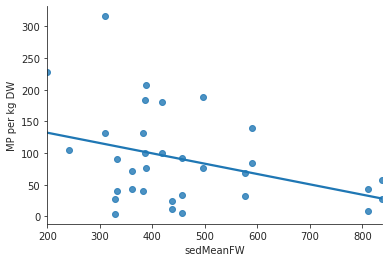

In [24]:
#mpIrr_sedStats.plot(kind='scatter',x='sedMeanFW',y=['MP per kg DW'], logy=True)
#df1['log_value'] = np.log(df1['University_Rank'])
df = pd.DataFrame(Stats_all,columns=['sedMeanFW', 'MP per kg DW'])
sns.set_style('ticks')
sns.regplot(df['sedMeanFW'], df['MP per kg DW'], ci=None)
sns.despine()  


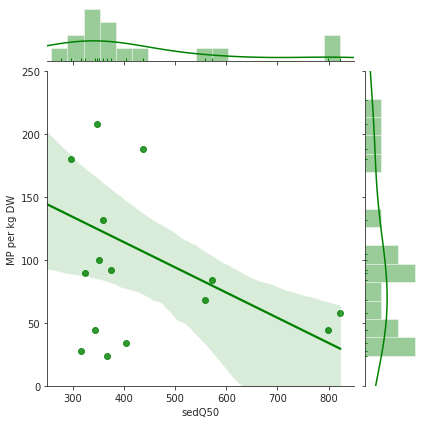

In [25]:
g=sns.jointplot(data = StatsIrr_all, x='sedQ50', y='MP per kg DW', kind='reg', color='g',xlim=[250, 850], ylim=[0,250],marginal_kws=dict(bins=20, rug=True))
#g=plt.show()
#g.ax_joint.set_yscale('log') #log scale MP
##g.savefig("MPIrr_sedQ50.png")

#some sediment data missing (4 beaches)
#not yet checked for size range relationsships, fibres, polymer types, HD/LD -> the more I fractionate the less robust the statistics
#MP analysis is not yet calibrated with IntStandards! ~ measure for efficiency of extraction! (not all data yet)

In [26]:
data = StatsIrr_all[['sedQ50','MP per kg DW']]
data.corr(method='pearson')
# -> median best fit out of all sedStats


,sedQ50,MP per kg DW
sedQ50,1.000000,-0.430431
MP per kg DW,-0.430431,1.000000


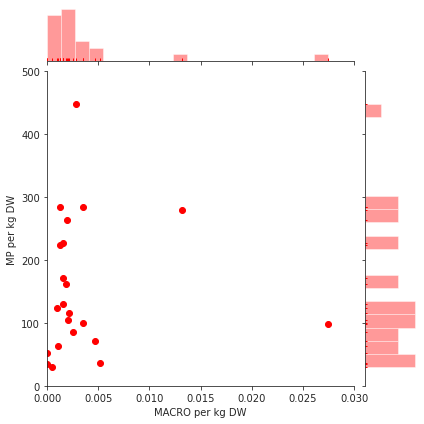

In [1610]:
g=sns.jointplot(data = Stats_all, x='MACRO per kg DW', y='MP per kg DW', kind='scatter', color='r',xlim=[0, 0.03], ylim=[0,500],marginal_kws=dict(bins=20, rug=True))
g.savefig("MP_MACRO.png")


In [1584]:
data = Stats_all[['MACRO per kg DW','MP per kg DW']]
data.corr(method='spearman')
#MACRO data not complete yet!
#if at all a negative relationship -> no effect of local fragmentation! 
#thus macroplastic pollution seems not to be a good indicator for microplastic on a local scale! sources and distribution mechanisms differ!
#not yet checked for size fraction wide correlation...
#potential study design error: area of MP sampled was much smaller than for macro -> small scall variability of MP could be relevant

,MACRO per kg DW,MP per kg DW
MACRO per kg DW,1.000000,0.219582
MP per kg DW,0.219582,1.000000


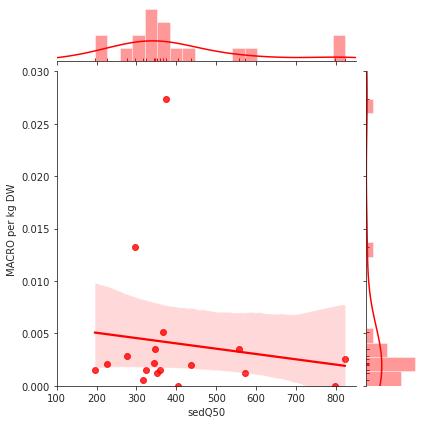

In [1592]:
g=sns.jointplot(data = Stats_all, x='sedQ50', y='MACRO per kg DW', kind='reg', color='r',ylim=[0, 0.03], xlim=[100,850],marginal_kws=dict(bins=20, rug=True))
g.savefig("MACRO_sedQ50.png")

In [1589]:
data = StatsIrr_all[['MACRO per kg DW','sedQ50']]
data.corr(method='spearman')
#fine sand beaches are less hit by stong winds, waves which could lead to that macroplastic remain longer / accumulate 
#-> not seen here, MACROplastc more likely a function of local activities (tourism) -> Mircos paper

,MACRO per kg DW,sedQ50
MACRO per kg DW,1.000000,-0.127396
sedQ50,-0.127396,1.000000


In [1476]:
#sns.jointplot(data = Stats_all, x='mp75_25', y='sed75_25', kind='reg', color='g',xlim=[150, 850], ylim=[0,350],marginal_kws=dict(bins=20, rug=True))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66714020a0>,
      dtype=object)

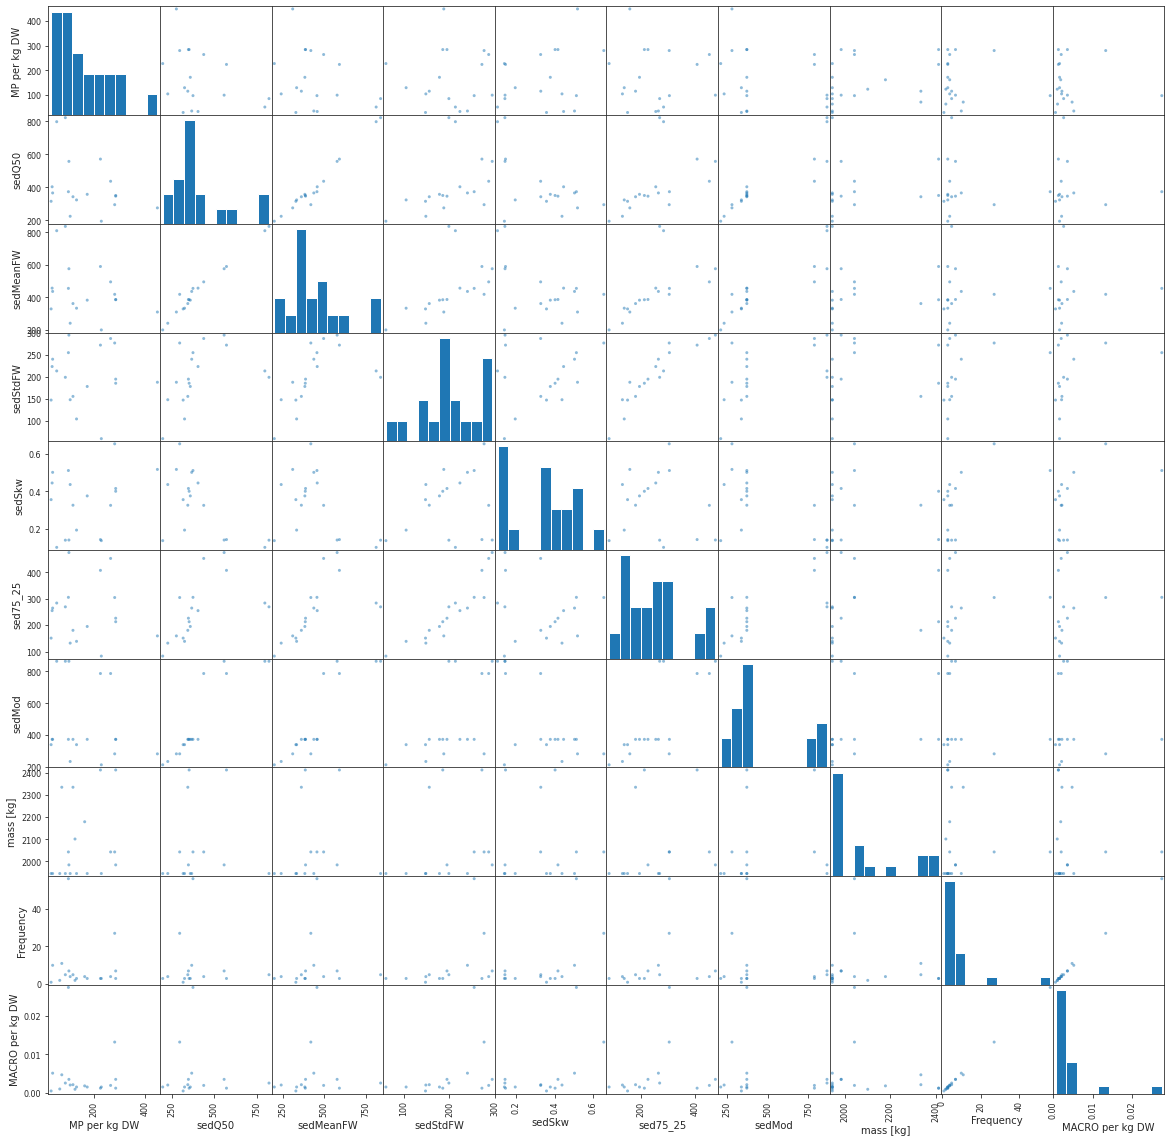

In [1477]:
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix
#pd.plotting.scatter_matrix(mpIrr_sedStats, alpha=0.2) #['count','mean','sedMeanMoM','sed75_25','sedMod'] #check plots
pd.plotting.scatter_matrix(Stats_all.iloc[:,10:20],figsize=[20,20])

# make a scatter plot
#scatter_matrix(mpIrr_sedStats,figsize=[20,20],marker='x')#,c=df.Survived.apply(lambda x:colors[x]))

#mpIrr_sedStats.info()


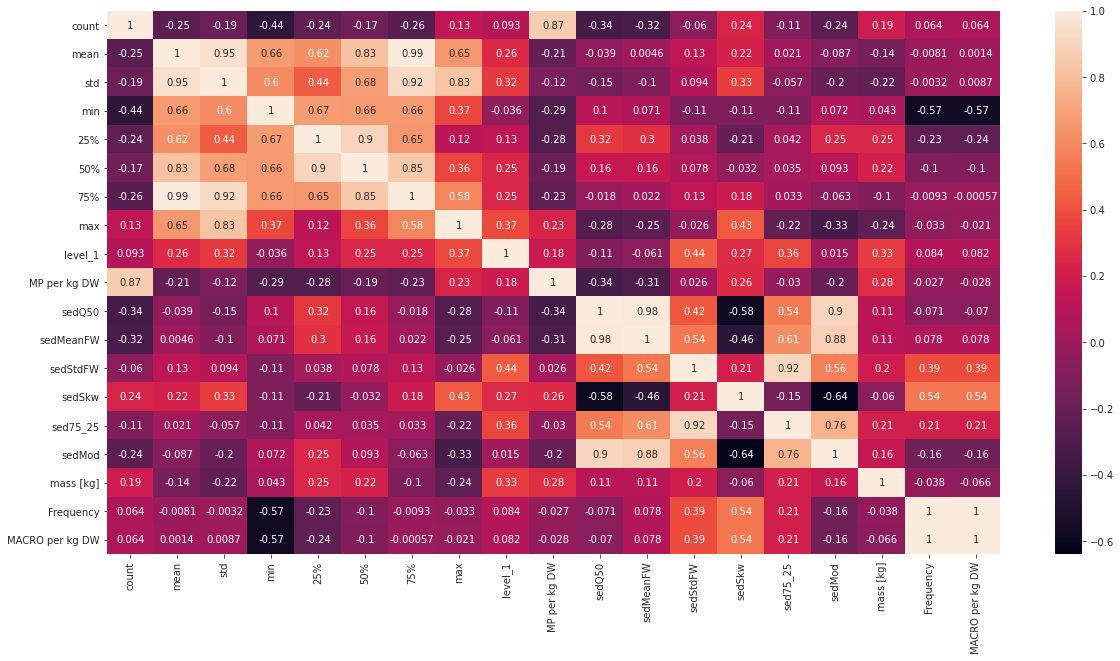

In [1495]:
plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(Stats_all.corr(), annot=True)
#sns.heatmap(Stats_all.corr(), annot=True, fmt=".2f")
#plt.show()

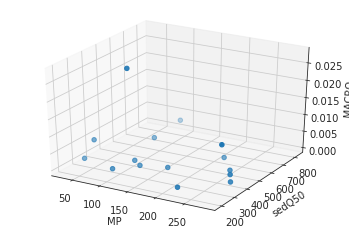

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [1480]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
%matplotlib inline

threedee = plt.figure().gca(projection='3d')
threedee.scatter(Stats_all['MP per kg DW'], Stats_all['sedQ50'], Stats_all['MACRO per kg DW'])
threedee.set_xlabel('MP')
threedee.set_ylabel('sedQ50')
threedee.set_zlabel('MACRO')
plt.show()

# rotate the axes and update
for angle in range(0, 360):
    threedee.view_init(180, angle)
    plt.draw()
    plt.pause(.001)

#df['H-L'] = df.High - df.Low
#df['100MA'] = pd.rolling_mean(df['Close'], 100)

In [1479]:
# scatter plot with categorical y-axis
def plot_3d(Stats_all, color):
    ax.scatter(Stats_all['MP per kg DW'], Stats_all['sedQ50'], Stats_all['MACRO per kg DW'], c=color) # dims must be floats

# reshape with melt(), then plot
plot_3d(pd.melt(sample4, id_vars='x', var_name='y', value_name='z'), 'red')
plot_3d(pd.melt(test5, id_vars='x', var_name='y', value_name='z'), 'blue')
plot_3d(pd.melt(test6, id_vars='x', var_name='y', value_name='z'), 'green')


NameError: name 'sample4' is not defined

In [ ]:
#create altair plots...
alt.Chart(Stats_all).mark_point().encode(
    x='sedQ50',
    y='MP per kg DW',
    opacity=alt.value(0.5)
)